# The Sparks Foundation

### Task 3-
## Exploratory Data Analysis- Retail

#### Author: [Adityaprava Sen](https://www.linkedin.com/in/adityaprava-sen-0911/)

### Problem Statement-

* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?

### Task-
> Create dashboards. Screen-record along with your
audio explaining the charts and interpretations.

### Dataset- [SampleSuperstore.csv](https://bit.ly/3i4rbWl) 

#### Required Tools

In [1]:
#regular EDA(exploratory data analysis) and plotting libraries-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

In [2]:
#load the data
df=pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Generalized Analysis
#### Objective: Gaining insights into the Data

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
#check missing values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
print("Total Sales and Profit Generated-")
print("Sales: ", df["Sales"].sum())
print("Profit: ", df["Profit"].sum())

print("\nTotal Profit Percentage:- ", (df["Profit"].sum()/df["Sales"].sum())*100,"%")

Total Sales and Profit Generated-
Sales:  2297200.8603
Profit:  286397.0217

Total Profit Percentage:-  12.467217240315605 %


In [10]:
#check for no. of duplicate rows in the Dataset
df.duplicated().sum()

17

In [11]:
#dropping Duplicate Rows
df=df.drop_duplicates()

In [12]:
df.shape

(9977, 13)

### Adding profit percentage metric to the dataset

In [13]:
df["ProfitPercentage"]=(df["Profit"]/df["Sales"])*100

**Observations:**
* The Dataset doesn't have any missing(NULL) values
* The Total Sales generated is 2297200.86 and the Total Profit is 286397.02
* the overall Profit percentage is 12%
* there are *9977* values in the dataset of which there are *17* duplicate values present

## Regional Analysis of Data

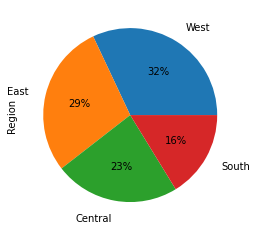

In [14]:
# transactions in each region

df["Region"].value_counts().plot.pie(autopct='%1.0f%%', 
                                    labeldistance=1.2);

**Maximum Transactions were made in the *WEST* Region while the minimum transactions were made in the *SOUTH* Region**

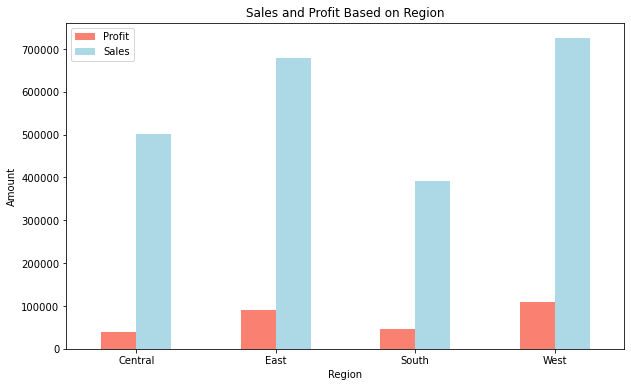

In [15]:
##Sales and Profit made by each Region

df.groupby(["Region"])[["Profit","Sales"]].sum().plot(kind="bar",
                                                 figsize=(10,6),
                                                 color=["salmon","lightblue"])
plt.title("Sales and Profit Based on Region")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.xticks(rotation=0);
plt.legend(["Profit","Sales"]);

**So the *WEST* region has the maximum sales and profit but *SOUTH* region has the least performance both in Sales as well as Profit**

## Customer Analysis

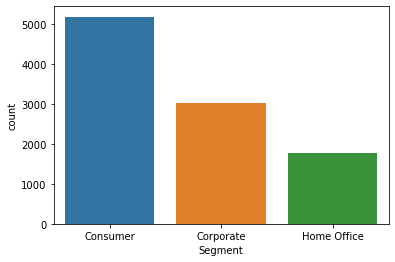

In [16]:
#max profit in each segment
sns.countplot(x=df["Segment"]);

**Maximum Sales is in the *Consumer* segment whereas minimum Sales is in the *Home Office* segment**

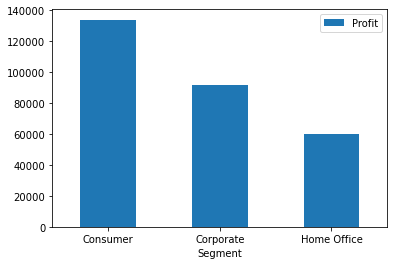

In [17]:
df.groupby(["Segment"])[["Profit"]].sum().plot.bar();
plt.xticks(rotation=0);

## Shipping Mode Analysis

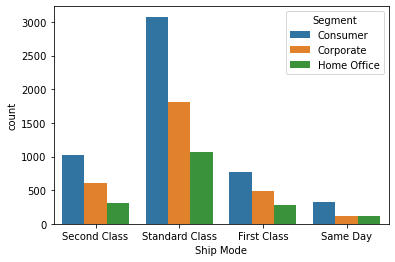

In [18]:
sns.countplot(x="Ship Mode", hue="Segment", data=df);

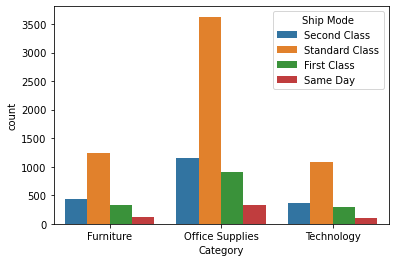

In [19]:
sns.countplot(x="Category", hue="Ship Mode", data=df);

1. **The overall maximum sales are in the *Standard Class* Shipping mode. and the lowest is from the *Same Day* Shipping mode.**
2. **Maximum Office Supplies are in *Standard mode* while <u>*Same Day*</u> shipping mode is the <u>least</u> in all categories.**
3. **Thus maximum sales and profit is generated frpm the *Standard Class* Shipping mode.**

## Product Analysis

In [20]:
df_temp=df.drop(["Postal Code"],axis=1)

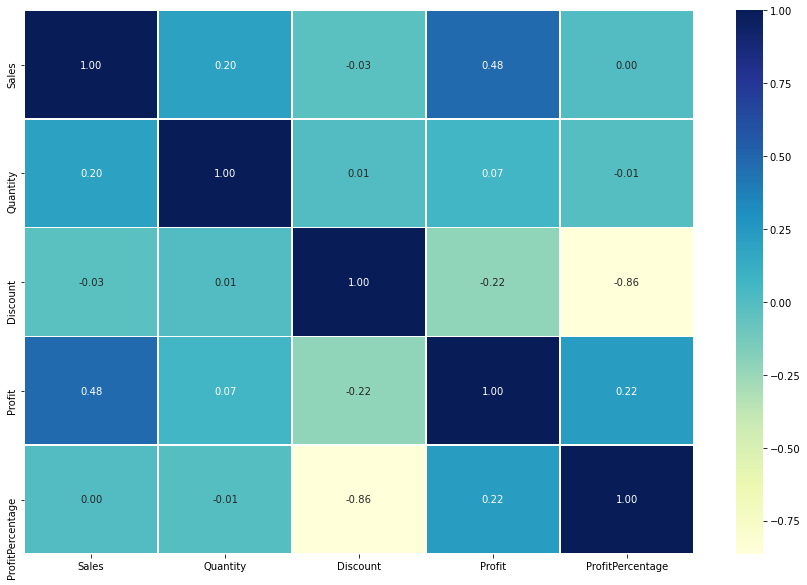

In [21]:
#Ptotting correlation matrix for Profit, Sales, Discount and Quantity

corr=df_temp.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

**From above Heatmap we can conclude that there is a <u>Negative correlation</u> in between *Profit* and *Discount* whereas a <u>Positive correlation</u> between Profit and Sales**

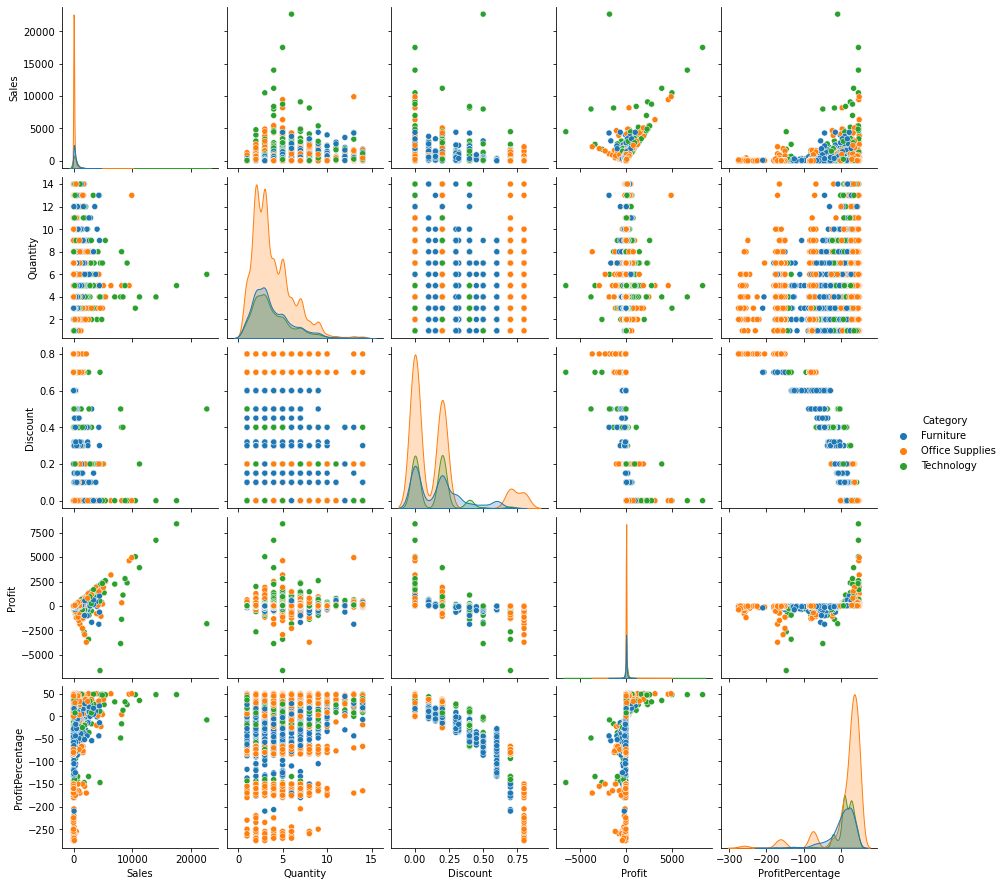

In [22]:
sns.pairplot(df_temp,hue='Category');

### Inferences From the above Scatterplot

1. As Sale increases the profit goes up for technogoly category
2. There is huge sales from quantities of 5-10 from the technology category.
3. As discount increases the sales of office supplies significatly drops down there there is a huge loss especially in the Technology and office supply categories.
4. As discount increases, the profit(%) for furnitures are highly affected.
5. The discount for office supplies are highest but there is no sales for office supplies even in high discounts.

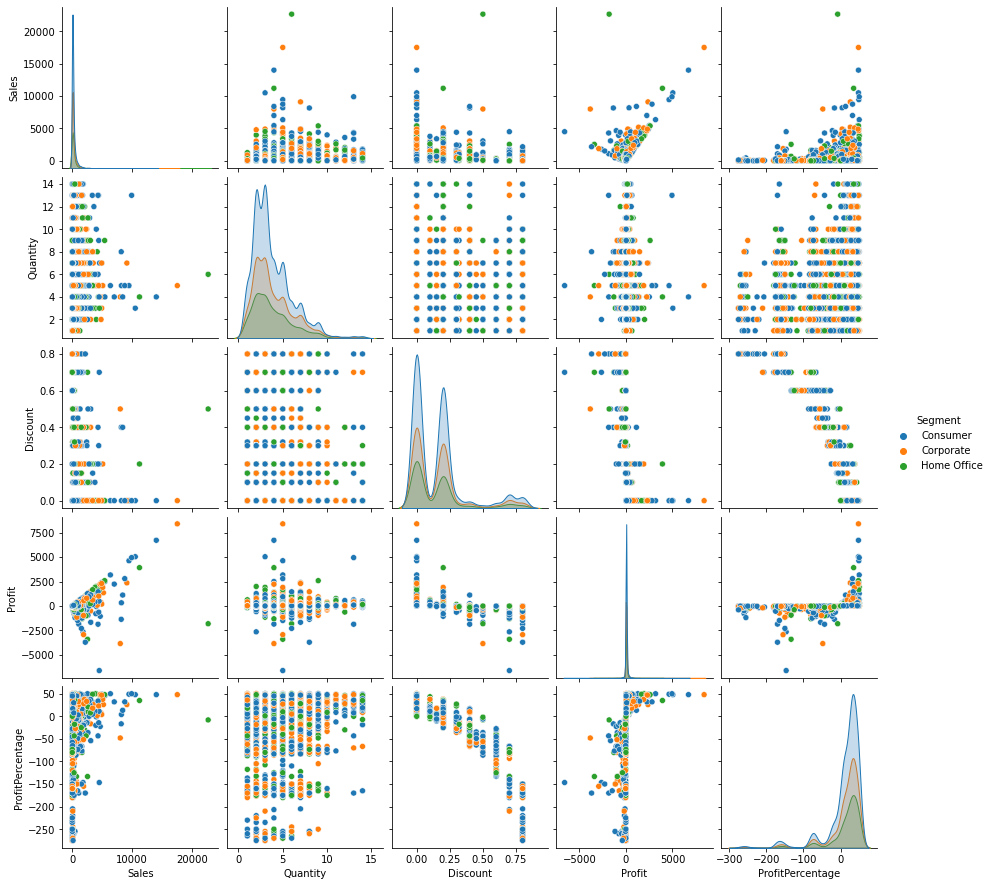

In [23]:
sns.pairplot(df_temp,hue='Segment');

### Inferences from the above Scatterplot

1. As the Discount increases the sales for Home Office Segment goes up in high amount but still the profit generated is really low, on the other hand the sales for the consumer and corporate segment decreases significantly thus both the segments suffer huge losses.
2. When Sale increases the profits from Corporate sector is the highest followed by the consumer segment, but there is a huge loss from the home office sector.

### Analysis of Profits generated from products

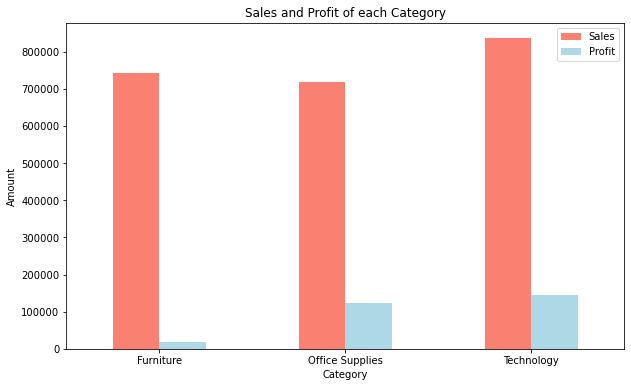

In [24]:
df.groupby("Category")[["Sales","Profit"]].sum().plot(kind="bar",
                                                     figsize=(10,6),
                                                     color=["salmon","lightblue"]);
plt.title("Sales and Profit of each Category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation=0);
plt.legend(["Sales","Profit"]);

**So the Sales and Profit from Technology is highest. But for the Furniture Category, though there is high sales, the profit margin is really low.**

#### Detailed Analysis of Furniture Category

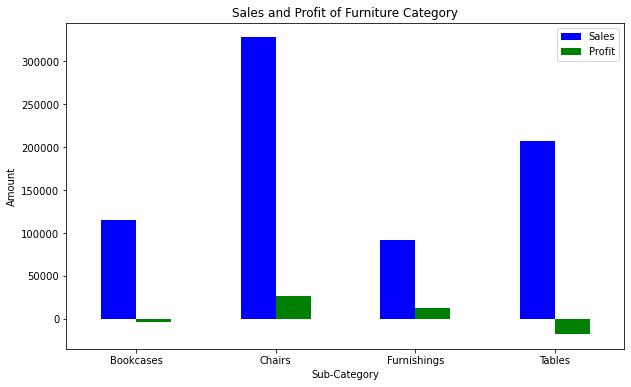

In [25]:
df[df["Category"]=="Furniture"].groupby("Sub-Category")[["Sales","Profit"]].sum().plot(kind="bar",
                                                                                      figsize=(10,6),
                                                                                      color=["blue","green"])
plt.title("Sales and Profit of Furniture Category")
plt.xlabel("Sub-Category")
plt.ylabel("Amount")
plt.xticks(rotation=0);

**The sales and profit of Bookcases is really low and while the sales of Tabels is moderately high, there is significant loss suffered form it, which is affecting the profit margin for the furniture category.**

In [26]:
print("Discount given on Tabels and Bookcases-\n")
print(f"Tabels- {df['Discount'][df['Sub-Category']=='Tables'].mean()*100}%")
print(f"Bookcases- {df['Discount'][df['Sub-Category']=='Bookcases'].mean()*100}%")
print(f"Chairs- {df['Discount'][df['Sub-Category']=='Chairs'].mean()*100}%")
print(f"Furnishings- {df['Discount'][df['Sub-Category']=='Furnishings'].mean()*100}%")

Discount given on Tabels and Bookcases-

Tabels- 26.128526645768048%
Bookcases- 21.114035087719298%
Chairs- 17.02439024390244%
Furnishings- 13.849372384937238%


**Since the Discount given on Tables and Bookcases is so high, and the sales are relatively low therefore both the products are suffering losses.**

### Detailed Analysis of Products

#### Top Products

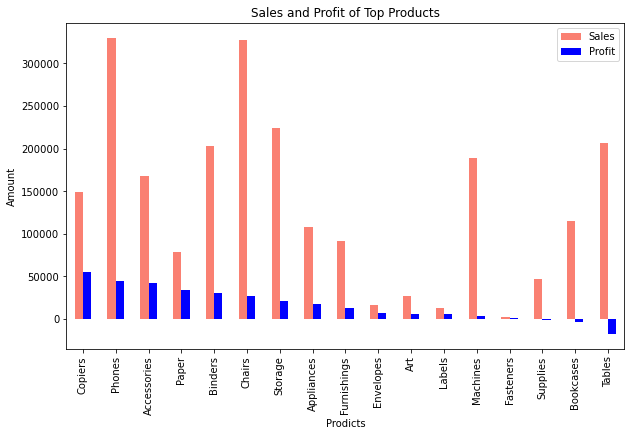

In [27]:
df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by="Profit",ascending=False).plot(kind="bar",
                                                                                          figsize=(10,6),
                                                                                          color=["salmon","blue"])
plt.title("Sales and Profit of Top Products")
plt.xlabel("Prodicts")
plt.ylabel("Amount");

**Copies, Phones and Accessories are top profit giving products, on the other hand Tabels and Bookcases are suffering from loss**

## State and City wise Analysis

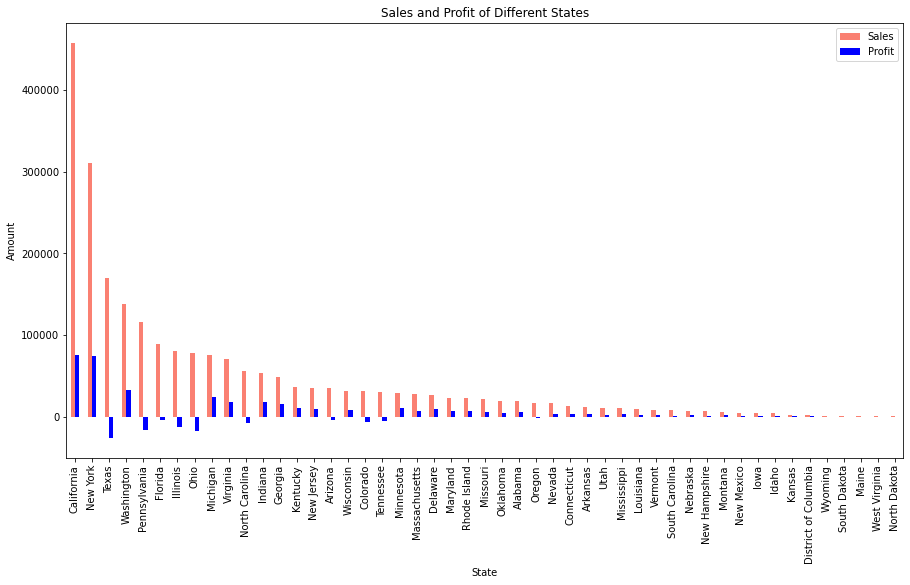

In [28]:
# plot for Sales and profit based on State
df.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",
                                                                                          figsize=(15,8),
                                                                                          color=["salmon","blue"]);
plt.title("Sales and Profit of Different States")
plt.xlabel("State")
plt.ylabel("Amount");

1. **high sales and profit in California and New York.**
2. **Losses in texas, pennsylvania, ohio and llinois.**

#### Cities that have high loss.

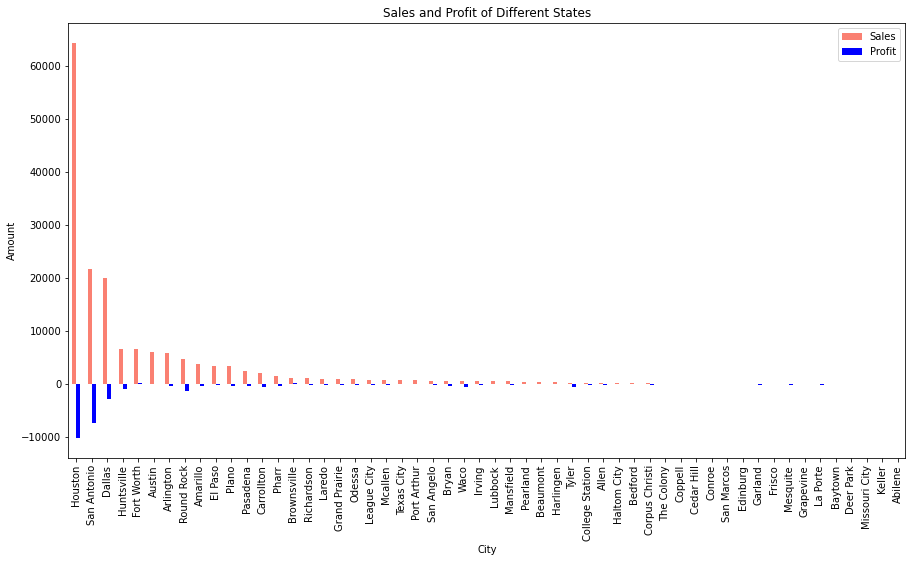

In [29]:
# plot for Sales and profit based on State
df[df["State"]=="Texas"].groupby("City")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",
                                                                                          figsize=(15,8),
                                                                                          color=["salmon","blue"]);
plt.title("Sales and Profit of Different States")
plt.xlabel("City")
plt.ylabel("Amount");

* Houston, San Antonio, Dallas Suffer from huge Loss though the sales is very high.

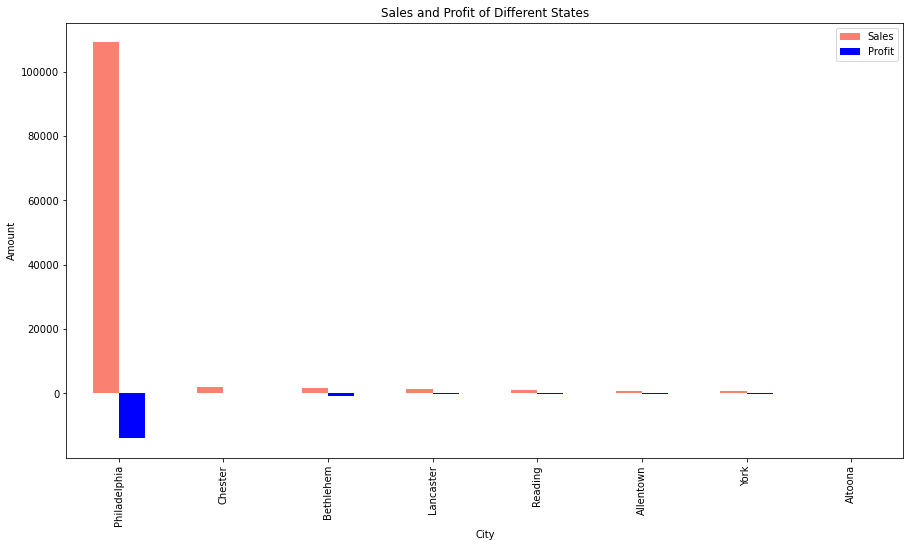

In [30]:
# plot for Sales and profit based on State
df[df["State"]=="Pennsylvania"].groupby("City")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",
                                                                                          figsize=(15,8),
                                                                                          color=["salmon","blue"]);
plt.title("Sales and Profit of Different States")
plt.xlabel("City")
plt.ylabel("Amount");

* Only Philadelphia Suffers from huge loss though the Sales is very High.

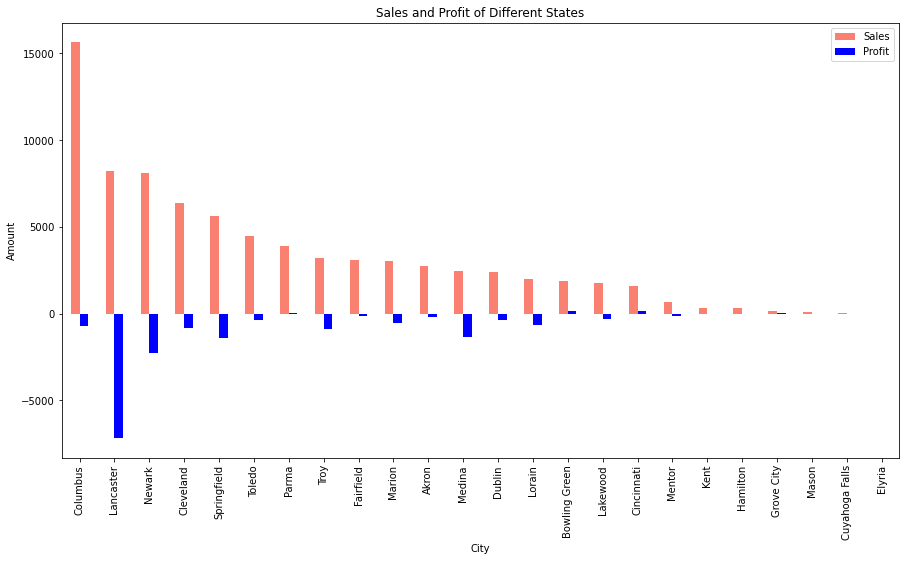

In [31]:
# plot for Sales and profit based on State
df[df["State"]=="Ohio"].groupby("City")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",
                                                                                          figsize=(15,8),
                                                                                          color=["salmon","blue"]);
plt.title("Sales and Profit of Different States")
plt.xlabel("City")
plt.ylabel("Amount");

* Lancaster Suffers from huge loss and the sales are relatively low too.
* Columbus Suffers from loss though the Sales is very High.

## Observations:-

1. **General Obversations**
    1. Total Sales- 2297200.86 USD
    2. Total Profit- 286397.0217
    3. Profit Prercentage- 12.46%
    
2. **Regional Analysis**
    1. Maximum Transactions were made in the WEST Region while the minimum transactions were made in the SOUTH Region
    2. So the WEST region has the maximum sales and profit but SOUTH region has the least performance both in Sales as well as Profit.

3. **Customer Analysis**
    1. Maximum Sales is in the Consumer segment whereas minimum Sales is in the Home Office segment.

4. **Shipping Mode Analysis**
    1. The overall maximum sales are in the Standard Class Shipping mode. and the lowest is from the Same Day Shipping mode.
    2. Maximum Office Supplies are in Standard mode while Same Day shipping mode is the least in all categories.
    3. Thus maximum sales and profit is generated frpm the Standard Class Shipping mode.
    
5. **Product Analysis**
    1. *Category Wise Analysis*
        1. As Sale increases the profit goes up for technology category
        2. There is huge sales from quantities of 5-10 from the technology category.
        3. As discount increases the sales of office supplies significatly drops down there there is a huge loss especially in the Technology and office supply categories.
        4. As discount increases, the profit(%) for furnitures are highly affected.
        5. The discount for office supplies are highest but there is no sales for office supplies even in high discounts.
    2. *Segment Wise Analysis*
        1. As the Discount increases the sales for Home Office Segment goes up in high amount but still the profit generated is really low, on the other hand the sales for the consumer and corporate segment decreases significantly thus both the segments suffer huge losses.
        2. When Sale increases the profits from Corporate sector is the highest followed by the consumer segment, but there is a huge loss from the home office sector.
        
6. **Analysis of Profits from Products**
    1. The Sales and Profit from Technology is highest. But for the Furniture Category, though there is high sales, the profit margin is really low.
    2. The sales and profit of Bookcases is really low and while the sales of Tabels is moderately high, there is significant loss suffered form it, which is affecting the profit margin for the furniture category.
    3. Since the Discount given on Tables and Bookcases is so high, and the sales are relatively low therefore both the products are suffering losses.
    4. Copies, Phones and Accessories are top profit giving products, on the other hand Tabels and Bookcases are suffering from loss.
    
7. **State and City wise Analysis**
    1. high sales and profit in California and New York.
    2. Losses in texas, pennsylvania, ohio and llinois.
    3. Cities that have high loss-
        1. Houston, San Antonio, Dallas Suffer from huge Loss though the sales is very high.
        2. Philadelphia Suffers from huge loss though the Sales is very High.
        3. Lancaster Suffers from huge loss and the sales are relatively low too.
        4. Columbus Suffers from loss though the Sales is very High.

# Conclusion-
> From Above Observation we conclude that FURNITURE CATEGORY is the WEAK AREA where we need to work upon. As in Furniture we have TABLES and BOOKCASES where due to HIGH DISCOUNT offered we are incurring LOSSES. So we need to REDUCE the DISCOUNT in order to INCREASE the PROFIT.